In [6]:
# This is an example of the comparison of data cubes using the HOG technique
#
# Prepared by Juan D. Soler (soler@mpia.de)

import sys
sys.path.append('../')
from astrohog2d import *
from astrohog2d1v import *

import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage
from rgbtools import *

In [18]:
# Load the cubes that you plan to compare
# Just for reference, I assume that the first index runs over the non-spatial coordinate
# Also assume that the cubes are spatially aligned and are reprojected into the same grid 

hdul = fits.open('../data/testcube1.fits')
cube1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube2=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube1.fits')
cube3=hdul[0].data[:,::-1,::-1]
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube4=hdul[0].data[:,::-1,::-1]
hdul.close()

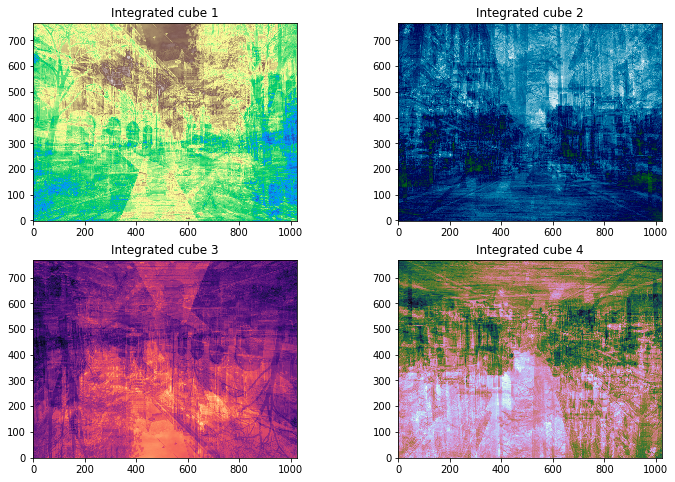

In [92]:
fig, ax = plt.subplots(2,2, figsize=(12., 8.))
ax[0,0].imshow(cube1.sum(axis=0), origin='lower', cmap='terrain')
ax[0,0].set_title('Integrated cube 1')
ax[0,1].imshow(cube2.sum(axis=0), origin='lower', cmap='ocean')
ax[0,1].set_title('Integrated cube 2')
ax[1,0].imshow(cube3.sum(axis=0), origin='lower', cmap='magma')
ax[1,0].set_title('Integrated cube 3')
ax[1,1].imshow(cube4.sum(axis=0), origin='lower', cmap='cubehelix')
ax[1,1].set_title('Integrated cube 4')
plt.show()

In [22]:
# Here you select the size of your derivative kernel in pixels
ksz=10

In [28]:
# Here I define the masks for both cubes
# For the sake of simplicity, I'm only masking the edges of the cubes
sz1=np.shape(cube1)
mask=1.+0.*cube1
mask[:,0:ksz,:]=0.
mask[:,sz1[1]-1-ksz:sz1[1]-1,:]=0.
mask[:,:,0:ksz]=0.
mask[:,:,sz1[2]-1-ksz:sz1[2]-1]=0.

In [29]:
# Here you define the channel ranges over which you want to compare the cubes
zmin1=0
zmax1=np.shape(cube1)[0]-1
zmin2=0
zmax2=np.shape(cube2)[0]-1
zmin3=0
zmax3=np.shape(cube3)[0]-1
zmin4=0
zmax4=np.shape(cube4)[0]-1

In [33]:
# Run the HOG
corrplane12, corrcube12, scube1, scube2 = HOGcorr_ppvcubes(cube1, cube2, zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask, mask2=mask)
corrplane13, corrcube13, scube1, scube3 = HOGcorr_ppvcubes(cube1, cube3, zmin1, zmax1, zmin3, zmax3, ksz=ksz, mask1=mask, mask2=mask)
corrplane14, corrcube14, scube1, scube4 = HOGcorr_ppvcubes(cube1, cube4, zmin1, zmax1, zmin4, zmax4, ksz=ksz, mask1=mask, mask2=mask)
corrplane23, corrcube23, scube2, scube3 = HOGcorr_ppvcubes(cube2, cube3, zmin2, zmax2, zmin3, zmax3, ksz=ksz, mask1=mask, mask2=mask)
corrplane24, corrcube24, scube2, scube4 = HOGcorr_ppvcubes(cube2, cube4, zmin2, zmax2, zmin4, zmax4, ksz=ksz, mask1=mask, mask2=mask)
corrplane34, corrcube34, scube3, scube4 = HOGcorr_ppvcubes(cube3, cube4, zmin3, zmax3, zmin4, zmax4, ksz=ksz, mask1=mask, mask2=mask)


  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5


  4%|▍         | 1/25 [00:00<00:12,  1.86it/s]

Channel 0/5 and 1/5


  8%|▊         | 2/25 [00:01<00:12,  1.91it/s]

Channel 0/5 and 2/5


 12%|█▏        | 3/25 [00:01<00:11,  1.98it/s]

Channel 0/5 and 3/5


 16%|█▌        | 4/25 [00:01<00:10,  2.04it/s]

Channel 0/5 and 4/5


 20%|██        | 5/25 [00:02<00:09,  2.02it/s]

Channel 0/5 and 5/5


 24%|██▍       | 6/25 [00:02<00:09,  1.96it/s]

Channel 1/5 and 0/5


 28%|██▊       | 7/25 [00:03<00:09,  1.84it/s]

Channel 1/5 and 1/5


 32%|███▏      | 8/25 [00:04<00:09,  1.79it/s]

Channel 1/5 and 2/5


 36%|███▌      | 9/25 [00:04<00:08,  1.86it/s]

Channel 1/5 and 3/5


 40%|████      | 10/25 [00:05<00:07,  1.92it/s]

Channel 1/5 and 4/5


 44%|████▍     | 11/25 [00:05<00:07,  1.95it/s]

Channel 1/5 and 5/5


 48%|████▊     | 12/25 [00:06<00:07,  1.85it/s]

Channel 2/5 and 0/5


 52%|█████▏    | 13/25 [00:06<00:07,  1.70it/s]

Channel 2/5 and 1/5


 56%|█████▌    | 14/25 [00:07<00:06,  1.73it/s]

Channel 2/5 and 2/5


 60%|██████    | 15/25 [00:08<00:05,  1.77it/s]

Channel 2/5 and 3/5


 64%|██████▍   | 16/25 [00:08<00:05,  1.80it/s]

Channel 2/5 and 4/5


 68%|██████▊   | 17/25 [00:09<00:05,  1.54it/s]

Channel 2/5 and 5/5


 72%|███████▏  | 18/25 [00:09<00:04,  1.64it/s]

Channel 3/5 and 0/5


 76%|███████▌  | 19/25 [00:10<00:03,  1.75it/s]

Channel 3/5 and 1/5


 80%|████████  | 20/25 [00:11<00:02,  1.80it/s]

Channel 3/5 and 2/5


 84%|████████▍ | 21/25 [00:11<00:02,  1.62it/s]

Channel 3/5 and 3/5


 88%|████████▊ | 22/25 [00:12<00:01,  1.61it/s]

Channel 3/5 and 4/5


 92%|█████████▏| 23/25 [00:12<00:01,  1.66it/s]

Channel 3/5 and 5/5


 96%|█████████▌| 24/25 [00:13<00:00,  1.63it/s]

Channel 4/5 and 0/5


100%|██████████| 25/25 [00:14<00:00,  1.64it/s]

Channel 4/5 and 1/5


26it [00:14,  1.75it/s]                        

Channel 4/5 and 2/5


27it [00:15,  1.83it/s]

Channel 4/5 and 3/5


28it [00:16,  1.45it/s]

Channel 4/5 and 4/5


29it [00:17,  1.17it/s]

Channel 4/5 and 5/5


30it [00:18,  1.27it/s]

Channel 5/5 and 0/5


31it [00:18,  1.41it/s]

Channel 5/5 and 1/5


32it [00:19,  1.55it/s]

Channel 5/5 and 2/5


33it [00:19,  1.62it/s]

Channel 5/5 and 3/5


34it [00:20,  1.68it/s]

Channel 5/5 and 4/5


35it [00:20,  1.75it/s]

Channel 5/5 and 5/5


36it [00:21,  1.70it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5


  4%|▍         | 1/25 [00:00<00:12,  1.89it/s]

Channel 0/5 and 1/5


  8%|▊         | 2/25 [00:01<00:12,  1.78it/s]

Channel 0/5 and 2/5


 12%|█▏        | 3/25 [00:01<00:11,  1.87it/s]

Channel 0/5 and 3/5


 16%|█▌        | 4/25 [00:02<00:11,  1.84it/s]

Channel 0/5 and 4/5


 20%|██        | 5/25 [00:03<00:13,  1.52it/s]

Channel 0/5 and 5/5


 24%|██▍       | 6/25 [00:03<00:12,  1.58it/s]

Channel 1/5 and 0/5


 28%|██▊       | 7/25 [00:04<00:10,  1.69it/s]

Channel 1/5 and 1/5


 32%|███▏      | 8/25 [00:04<00:10,  1.70it/s]

Channel 1/5 and 2/5


 36%|███▌      | 9/25 [00:05<00:09,  1.77it/s]

Channel 1/5 and 3/5


 40%|████      | 10/25 [00:05<00:08,  1.83it/s]

Channel 1/5 and 4/5


 44%|████▍     | 11/25 [00:06<00:07,  1.92it/s]

Channel 1/5 and 5/5


 48%|████▊     | 12/25 [00:06<00:06,  2.01it/s]

Channel 2/5 and 0/5


 52%|█████▏    | 13/25 [00:07<00:05,  2.07it/s]

Channel 2/5 and 1/5


 56%|█████▌    | 14/25 [00:07<00:05,  2.10it/s]

Channel 2/5 and 2/5


 60%|██████    | 15/25 [00:08<00:04,  2.14it/s]

Channel 2/5 and 3/5


 64%|██████▍   | 16/25 [00:08<00:04,  2.06it/s]

Channel 2/5 and 4/5


 68%|██████▊   | 17/25 [00:09<00:04,  1.99it/s]

Channel 2/5 and 5/5


 72%|███████▏  | 18/25 [00:09<00:03,  1.95it/s]

Channel 3/5 and 0/5


 76%|███████▌  | 19/25 [00:10<00:03,  1.66it/s]

Channel 3/5 and 1/5


 80%|████████  | 20/25 [00:11<00:03,  1.55it/s]

Channel 3/5 and 2/5


 84%|████████▍ | 21/25 [00:11<00:02,  1.65it/s]

Channel 3/5 and 3/5


 88%|████████▊ | 22/25 [00:12<00:01,  1.74it/s]

Channel 3/5 and 4/5


 92%|█████████▏| 23/25 [00:12<00:01,  1.70it/s]

Channel 3/5 and 5/5


 96%|█████████▌| 24/25 [00:13<00:00,  1.73it/s]

Channel 4/5 and 0/5


100%|██████████| 25/25 [00:13<00:00,  1.72it/s]

Channel 4/5 and 1/5


26it [00:14,  1.72it/s]                        

Channel 4/5 and 2/5


27it [00:15,  1.71it/s]

Channel 4/5 and 3/5


28it [00:15,  1.78it/s]

Channel 4/5 and 4/5


29it [00:16,  1.80it/s]

Channel 4/5 and 5/5


30it [00:16,  1.79it/s]

Channel 5/5 and 0/5


31it [00:17,  1.85it/s]

Channel 5/5 and 1/5


32it [00:17,  1.88it/s]

Channel 5/5 and 2/5


33it [00:18,  1.91it/s]

Channel 5/5 and 3/5


34it [00:18,  1.96it/s]

Channel 5/5 and 4/5


35it [00:19,  2.00it/s]

Channel 5/5 and 5/5


36it [00:19,  1.83it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5


  4%|▍         | 1/25 [00:00<00:12,  1.90it/s]

Channel 0/5 and 1/5


  8%|▊         | 2/25 [00:01<00:12,  1.87it/s]

Channel 0/5 and 2/5


 12%|█▏        | 3/25 [00:01<00:11,  1.93it/s]

Channel 0/5 and 3/5


 16%|█▌        | 4/25 [00:02<00:10,  1.98it/s]

Channel 0/5 and 4/5


 20%|██        | 5/25 [00:02<00:09,  2.01it/s]

Channel 0/5 and 5/5


 24%|██▍       | 6/25 [00:03<00:09,  1.99it/s]

Channel 1/5 and 0/5


 28%|██▊       | 7/25 [00:03<00:09,  1.98it/s]

Channel 1/5 and 1/5


 32%|███▏      | 8/25 [00:04<00:08,  1.99it/s]

Channel 1/5 and 2/5


 36%|███▌      | 9/25 [00:04<00:08,  1.93it/s]

Channel 1/5 and 3/5


 40%|████      | 10/25 [00:05<00:07,  1.94it/s]

Channel 1/5 and 4/5


 44%|████▍     | 11/25 [00:05<00:07,  1.93it/s]

Channel 1/5 and 5/5


 48%|████▊     | 12/25 [00:06<00:07,  1.84it/s]

Channel 2/5 and 0/5


 52%|█████▏    | 13/25 [00:06<00:06,  1.81it/s]

Channel 2/5 and 1/5


 56%|█████▌    | 14/25 [00:07<00:06,  1.83it/s]

Channel 2/5 and 2/5


 60%|██████    | 15/25 [00:08<00:06,  1.48it/s]

Channel 2/5 and 3/5


 64%|██████▍   | 16/25 [00:08<00:05,  1.53it/s]

Channel 2/5 and 4/5


 68%|██████▊   | 17/25 [00:09<00:04,  1.63it/s]

Channel 2/5 and 5/5


 72%|███████▏  | 18/25 [00:09<00:04,  1.74it/s]

Channel 3/5 and 0/5


 76%|███████▌  | 19/25 [00:10<00:03,  1.82it/s]

Channel 3/5 and 1/5


 80%|████████  | 20/25 [00:10<00:02,  1.88it/s]

Channel 3/5 and 2/5


 84%|████████▍ | 21/25 [00:11<00:02,  1.92it/s]

Channel 3/5 and 3/5


 88%|████████▊ | 22/25 [00:11<00:01,  1.94it/s]

Channel 3/5 and 4/5


 92%|█████████▏| 23/25 [00:12<00:01,  1.96it/s]

Channel 3/5 and 5/5


 96%|█████████▌| 24/25 [00:12<00:00,  1.95it/s]

Channel 4/5 and 0/5


100%|██████████| 25/25 [00:13<00:00,  1.96it/s]

Channel 4/5 and 1/5


26it [00:13,  1.94it/s]                        

Channel 4/5 and 2/5


27it [00:14,  1.96it/s]

Channel 4/5 and 3/5


28it [00:14,  1.97it/s]

Channel 4/5 and 4/5


29it [00:15,  1.99it/s]

Channel 4/5 and 5/5


30it [00:15,  1.96it/s]

Channel 5/5 and 0/5


31it [00:16,  1.89it/s]

Channel 5/5 and 1/5


32it [00:17,  1.82it/s]

Channel 5/5 and 2/5


33it [00:17,  1.81it/s]

Channel 5/5 and 3/5


34it [00:18,  1.85it/s]

Channel 5/5 and 4/5


35it [00:18,  1.88it/s]

Channel 5/5 and 5/5


36it [00:19,  1.87it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5


  4%|▍         | 1/25 [00:00<00:12,  1.95it/s]

Channel 0/5 and 1/5


  8%|▊         | 2/25 [00:01<00:11,  1.94it/s]

Channel 0/5 and 2/5


 12%|█▏        | 3/25 [00:01<00:11,  1.95it/s]

Channel 0/5 and 3/5


 16%|█▌        | 4/25 [00:02<00:10,  1.97it/s]

Channel 0/5 and 4/5


 20%|██        | 5/25 [00:02<00:10,  1.97it/s]

Channel 0/5 and 5/5


 24%|██▍       | 6/25 [00:03<00:09,  1.98it/s]

Channel 1/5 and 0/5


 28%|██▊       | 7/25 [00:03<00:09,  1.98it/s]

Channel 1/5 and 1/5


 32%|███▏      | 8/25 [00:04<00:08,  1.96it/s]

Channel 1/5 and 2/5


 36%|███▌      | 9/25 [00:04<00:08,  1.95it/s]

Channel 1/5 and 3/5


 40%|████      | 10/25 [00:05<00:07,  1.94it/s]

Channel 1/5 and 4/5


 44%|████▍     | 11/25 [00:05<00:07,  1.87it/s]

Channel 1/5 and 5/5


 48%|████▊     | 12/25 [00:06<00:06,  1.89it/s]

Channel 2/5 and 0/5


 52%|█████▏    | 13/25 [00:06<00:06,  1.92it/s]

Channel 2/5 and 1/5


 56%|█████▌    | 14/25 [00:07<00:05,  1.94it/s]

Channel 2/5 and 2/5


 60%|██████    | 15/25 [00:07<00:05,  1.93it/s]

Channel 2/5 and 3/5


 64%|██████▍   | 16/25 [00:08<00:04,  1.95it/s]

Channel 2/5 and 4/5


 68%|██████▊   | 17/25 [00:08<00:04,  1.97it/s]

Channel 2/5 and 5/5


 72%|███████▏  | 18/25 [00:09<00:03,  1.96it/s]

Channel 3/5 and 0/5


 76%|███████▌  | 19/25 [00:09<00:03,  1.94it/s]

Channel 3/5 and 1/5


 80%|████████  | 20/25 [00:10<00:02,  1.92it/s]

Channel 3/5 and 2/5


 84%|████████▍ | 21/25 [00:10<00:02,  1.93it/s]

Channel 3/5 and 3/5


 88%|████████▊ | 22/25 [00:11<00:01,  1.92it/s]

Channel 3/5 and 4/5


 92%|█████████▏| 23/25 [00:11<00:01,  1.94it/s]

Channel 3/5 and 5/5


 96%|█████████▌| 24/25 [00:12<00:00,  1.92it/s]

Channel 4/5 and 0/5


100%|██████████| 25/25 [00:12<00:00,  1.88it/s]

Channel 4/5 and 1/5


26it [00:13,  1.83it/s]                        

Channel 4/5 and 2/5


27it [00:14,  1.82it/s]

Channel 4/5 and 3/5


28it [00:14,  1.84it/s]

Channel 4/5 and 4/5


29it [00:15,  1.83it/s]

Channel 4/5 and 5/5


30it [00:15,  1.87it/s]

Channel 5/5 and 0/5


31it [00:16,  1.90it/s]

Channel 5/5 and 1/5


32it [00:16,  1.91it/s]

Channel 5/5 and 2/5


33it [00:17,  1.87it/s]

Channel 5/5 and 3/5


34it [00:17,  1.90it/s]

Channel 5/5 and 4/5


35it [00:18,  1.93it/s]

Channel 5/5 and 5/5


36it [00:18,  1.92it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5


  4%|▍         | 1/25 [00:00<00:13,  1.73it/s]

Channel 0/5 and 1/5


  8%|▊         | 2/25 [00:01<00:13,  1.67it/s]

Channel 0/5 and 2/5


 12%|█▏        | 3/25 [00:01<00:14,  1.55it/s]

Channel 0/5 and 3/5


 16%|█▌        | 4/25 [00:02<00:13,  1.51it/s]

Channel 0/5 and 4/5


 20%|██        | 5/25 [00:03<00:15,  1.30it/s]

Channel 0/5 and 5/5


 24%|██▍       | 6/25 [00:04<00:16,  1.18it/s]

Channel 1/5 and 0/5


 28%|██▊       | 7/25 [00:05<00:16,  1.12it/s]

Channel 1/5 and 1/5


 32%|███▏      | 8/25 [00:06<00:14,  1.14it/s]

Channel 1/5 and 2/5


 36%|███▌      | 9/25 [00:07<00:15,  1.04it/s]

Channel 1/5 and 3/5


 40%|████      | 10/25 [00:08<00:12,  1.17it/s]

Channel 1/5 and 4/5


 44%|████▍     | 11/25 [00:08<00:10,  1.33it/s]

Channel 1/5 and 5/5


 48%|████▊     | 12/25 [00:09<00:08,  1.48it/s]

Channel 2/5 and 0/5


 52%|█████▏    | 13/25 [00:09<00:07,  1.61it/s]

Channel 2/5 and 1/5


 56%|█████▌    | 14/25 [00:10<00:06,  1.63it/s]

Channel 2/5 and 2/5


 60%|██████    | 15/25 [00:11<00:06,  1.61it/s]

Channel 2/5 and 3/5


 64%|██████▍   | 16/25 [00:11<00:05,  1.69it/s]

Channel 2/5 and 4/5


 68%|██████▊   | 17/25 [00:12<00:04,  1.77it/s]

Channel 2/5 and 5/5


 72%|███████▏  | 18/25 [00:12<00:03,  1.85it/s]

Channel 3/5 and 0/5


 76%|███████▌  | 19/25 [00:13<00:03,  1.92it/s]

Channel 3/5 and 1/5


 80%|████████  | 20/25 [00:13<00:02,  1.97it/s]

Channel 3/5 and 2/5


 84%|████████▍ | 21/25 [00:14<00:02,  1.99it/s]

Channel 3/5 and 3/5


 88%|████████▊ | 22/25 [00:14<00:01,  1.64it/s]

Channel 3/5 and 4/5


 92%|█████████▏| 23/25 [00:15<00:01,  1.56it/s]

Channel 3/5 and 5/5


 96%|█████████▌| 24/25 [00:16<00:00,  1.50it/s]

Channel 4/5 and 0/5


100%|██████████| 25/25 [00:16<00:00,  1.55it/s]

Channel 4/5 and 1/5


26it [00:18,  1.22it/s]                        

Channel 4/5 and 2/5


27it [00:19,  1.10it/s]

Channel 4/5 and 3/5


28it [00:19,  1.16it/s]

Channel 4/5 and 4/5


29it [00:20,  1.23it/s]

Channel 4/5 and 5/5


30it [00:21,  1.28it/s]

Channel 5/5 and 0/5


31it [00:22,  1.37it/s]

Channel 5/5 and 1/5


32it [00:22,  1.47it/s]

Channel 5/5 and 2/5


33it [00:23,  1.53it/s]

Channel 5/5 and 3/5


34it [00:23,  1.64it/s]

Channel 5/5 and 4/5


35it [00:24,  1.75it/s]

Channel 5/5 and 5/5


36it [00:24,  1.46it/s]
  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5


  4%|▍         | 1/25 [00:00<00:12,  1.88it/s]

Channel 0/5 and 1/5


  8%|▊         | 2/25 [00:01<00:12,  1.87it/s]

Channel 0/5 and 2/5


 12%|█▏        | 3/25 [00:01<00:11,  1.86it/s]

Channel 0/5 and 3/5


 16%|█▌        | 4/25 [00:02<00:11,  1.85it/s]

Channel 0/5 and 4/5


 20%|██        | 5/25 [00:02<00:10,  1.88it/s]

Channel 0/5 and 5/5


 24%|██▍       | 6/25 [00:03<00:10,  1.89it/s]

Channel 1/5 and 0/5


 28%|██▊       | 7/25 [00:03<00:10,  1.72it/s]

Channel 1/5 and 1/5


 32%|███▏      | 8/25 [00:04<00:09,  1.78it/s]

Channel 1/5 and 2/5


 36%|███▌      | 9/25 [00:04<00:09,  1.77it/s]

Channel 1/5 and 3/5


 40%|████      | 10/25 [00:05<00:08,  1.80it/s]

Channel 1/5 and 4/5


 44%|████▍     | 11/25 [00:06<00:07,  1.85it/s]

Channel 1/5 and 5/5


 48%|████▊     | 12/25 [00:06<00:06,  1.89it/s]

Channel 2/5 and 0/5


 52%|█████▏    | 13/25 [00:07<00:06,  1.91it/s]

Channel 2/5 and 1/5


 56%|█████▌    | 14/25 [00:07<00:05,  1.86it/s]

Channel 2/5 and 2/5


 60%|██████    | 15/25 [00:08<00:05,  1.86it/s]

Channel 2/5 and 3/5


 64%|██████▍   | 16/25 [00:08<00:04,  1.87it/s]

Channel 2/5 and 4/5


 68%|██████▊   | 17/25 [00:09<00:04,  1.90it/s]

Channel 2/5 and 5/5


 72%|███████▏  | 18/25 [00:09<00:03,  1.90it/s]

Channel 3/5 and 0/5


 76%|███████▌  | 19/25 [00:10<00:03,  1.52it/s]

Channel 3/5 and 1/5


 80%|████████  | 20/25 [00:11<00:03,  1.40it/s]

Channel 3/5 and 2/5


 84%|████████▍ | 21/25 [00:12<00:03,  1.24it/s]

Channel 3/5 and 3/5


 88%|████████▊ | 22/25 [00:13<00:02,  1.17it/s]

Channel 3/5 and 4/5


 92%|█████████▏| 23/25 [00:14<00:01,  1.12it/s]

Channel 3/5 and 5/5


 96%|█████████▌| 24/25 [00:15<00:00,  1.10it/s]

Channel 4/5 and 0/5


100%|██████████| 25/25 [00:16<00:00,  1.10it/s]

Channel 4/5 and 1/5


26it [00:17,  1.17it/s]                        

Channel 4/5 and 2/5


27it [00:17,  1.26it/s]

Channel 4/5 and 3/5


28it [00:18,  1.30it/s]

Channel 4/5 and 4/5


29it [00:19,  1.39it/s]

Channel 4/5 and 5/5


30it [00:19,  1.47it/s]

Channel 5/5 and 0/5


31it [00:20,  1.51it/s]

Channel 5/5 and 1/5


32it [00:20,  1.50it/s]

Channel 5/5 and 2/5


33it [00:21,  1.50it/s]

Channel 5/5 and 3/5


34it [00:22,  1.58it/s]

Channel 5/5 and 4/5


35it [00:22,  1.66it/s]

Channel 5/5 and 5/5


36it [00:23,  1.55it/s]


In [83]:
# The outputs are: 
rplane12=corrplane12[0]
rplane13=corrplane13[0]
rplane14=corrplane14[0]
rplane23=corrplane23[0]
rplane24=corrplane24[0]
rplane34=corrplane34[0]
maxrplane=np.max([rplane12,rplane13,rplane14,rplane23,rplane24,rplane34])

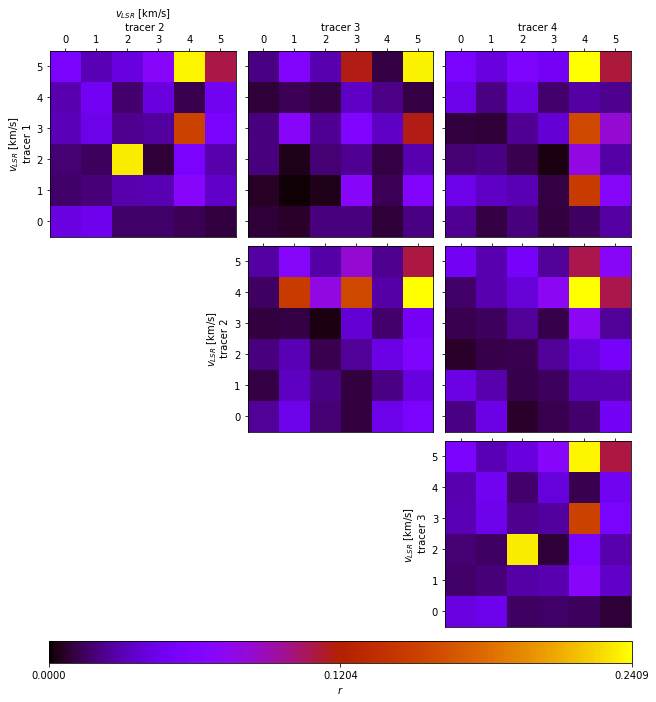

In [97]:
# Here for example, we show the mean resulting vector (r)
fig, ax = plt.subplots(figsize=(9., 10.))
plt.rc('font', size=10)
ax1=plt.subplot(331)
im=ax1.imshow(rplane12,origin='lower',clim=[0.,maxrplane],interpolation='None',cmap='gnuplot')
ax1.set_xlabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 2')
ax1.xaxis.set_label_position("top")
ax1.set_ylabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 1')
ax1.tick_params(axis="x", bottom=False, labelbottom=False)
ax1.tick_params(axis="x", top=True, labeltop=True)
ax2=plt.subplot(332)
im=ax2.imshow(rplane13,origin='lower',clim=[0.,maxrplane],interpolation='None',cmap='gnuplot')
ax2.xaxis.set_label_position("top")
ax2.set_xlabel('\n'+'tracer 3')
ax2.set_ylabel('')
ax2.tick_params(axis="x", bottom=False, labelbottom=False)
ax2.tick_params(axis="x", top=True, labeltop=True)
ax2.tick_params(axis="y", left=True, labelleft=False)
ax3=plt.subplot(333)
im=ax3.imshow(rplane14,origin='lower',clim=[0.,maxrplane],interpolation='None',cmap='gnuplot')
ax3.xaxis.set_label_position("top")
ax3.set_xlabel('\n'+'tracer 4')
ax3.set_ylabel('')
ax3.tick_params(axis="x", bottom=False, labelbottom=False)
ax3.tick_params(axis="x", top=True, labeltop=True)
ax3.tick_params(axis="y", left=True, labelleft=False)
ax4=plt.subplot(335)
im=ax4.imshow(rplane23,origin='lower',clim=[0.,maxrplane],interpolation='None',cmap='gnuplot')
#ax1.set_xlabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 2')
ax4.xaxis.set_label_position("top")
ax4.set_ylabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 2')
ax4.tick_params(axis="x", bottom=False, labelbottom=False)
ax4.tick_params(axis="x", top=True, labeltop=False)
ax5=plt.subplot(336)
im=ax5.imshow(rplane24,origin='lower',clim=[0.,maxrplane],interpolation='None',cmap='gnuplot')
ax5.xaxis.set_label_position("top")
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.tick_params(axis="x", bottom=False, labelbottom=False)
ax5.tick_params(axis="x", top=True, labeltop=False)
ax5.tick_params(axis="y", left=True, labelleft=False)
ax6=plt.subplot(3,3,9)
im=ax6.imshow(rplane34,origin='lower',clim=[0.,maxrplane],interpolation='None',cmap='gnuplot')
ax6.xaxis.set_label_position("top")
ax6.set_xlabel('')
ax6.set_ylabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 3')
ax6.tick_params(axis="x", bottom=False, labelbottom=False)
ax6.tick_params(axis="x", top=True, labeltop=False)
colorbar_ax=fig.add_axes([0.05, 0.1, 0.9, 0.03])
cbar=fig.colorbar(im, cax=colorbar_ax, ticks=[0., 0.5*maxrplane, maxrplane], orientation='horizontal')
cbar.set_label(r'$r$')
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, top=0.95, wspace = 0.05, hspace = 0.05)
plt.show()

In [94]:
# The outputs are: 
vplane12=corrplane12[2]
vplane13=corrplane13[2]
vplane14=corrplane14[2]
vplane23=corrplane23[2]
vplane24=corrplane24[2]
vplane34=corrplane34[2]
maxvplane=np.max([vplane12,vplane13,vplane14,vplane23,vplane24,vplane34])

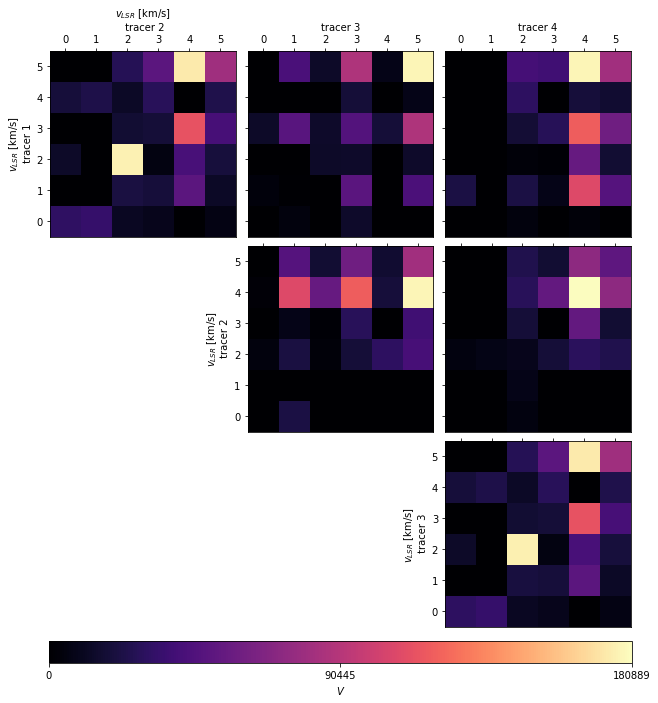

In [96]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.
vplane =corrplane[2]

fig, ax = plt.subplots(figsize=(9., 10.))
plt.rc('font', size=10)
ax1=plt.subplot(331)
im=ax1.imshow(vplane12,origin='lower',clim=[0.,maxvplane],interpolation='None',cmap='magma')
ax1.set_xlabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 2')
ax1.xaxis.set_label_position("top")
ax1.set_ylabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 1')
ax1.tick_params(axis="x", bottom=False, labelbottom=False)
ax1.tick_params(axis="x", top=True, labeltop=True)
ax2=plt.subplot(332)
im=ax2.imshow(vplane13,origin='lower',clim=[0.,maxvplane],interpolation='None',cmap='magma')
ax2.xaxis.set_label_position("top")
ax2.set_xlabel('\n'+'tracer 3')
ax2.set_ylabel('')
ax2.tick_params(axis="x", bottom=False, labelbottom=False)
ax2.tick_params(axis="x", top=True, labeltop=True)
ax2.tick_params(axis="y", left=True, labelleft=False)
ax3=plt.subplot(333)
im=ax3.imshow(vplane14,origin='lower',clim=[0.,maxvplane],interpolation='None',cmap='magma')
ax3.xaxis.set_label_position("top")
ax3.set_xlabel('\n'+'tracer 4')
ax3.set_ylabel('')
ax3.tick_params(axis="x", bottom=False, labelbottom=False)
ax3.tick_params(axis="x", top=True, labeltop=True)
ax3.tick_params(axis="y", left=True, labelleft=False)
ax4=plt.subplot(335)
im=ax4.imshow(vplane23,origin='lower',clim=[0.,maxvplane],interpolation='None',cmap='magma')
#ax1.set_xlabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 2')
ax4.xaxis.set_label_position("top")
ax4.set_ylabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 2')
ax4.tick_params(axis="x", bottom=False, labelbottom=False)
ax4.tick_params(axis="x", top=True, labeltop=False)
ax5=plt.subplot(336)
im=ax5.imshow(vplane24,origin='lower',clim=[0.,maxvplane],interpolation='None',cmap='magma')
ax5.xaxis.set_label_position("top")
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.tick_params(axis="x", bottom=False, labelbottom=False)
ax5.tick_params(axis="x", top=True, labeltop=False)
ax5.tick_params(axis="y", left=True, labelleft=False)
ax6=plt.subplot(3,3,9)
im=ax6.imshow(vplane34,origin='lower',clim=[0.,maxvplane],interpolation='None',cmap='magma')
ax6.xaxis.set_label_position("top")
ax6.set_xlabel('')
ax6.set_ylabel(r'$v_{LSR}'+'}$ [km/s]\n '+'tracer 3')
ax6.tick_params(axis="x", bottom=False, labelbottom=False)
ax6.tick_params(axis="x", top=True, labeltop=False)
colorbar_ax=fig.add_axes([0.05, 0.1, 0.9, 0.03])
cbar=fig.colorbar(im, cax=colorbar_ax, ticks=[0., 0.5*maxvplane, maxvplane], orientation='horizontal')
cbar.set_label(r'$V$')
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, top=0.95, wspace = 0.05, hspace = 0.05)
plt.show()
